In [1]:
!pip install --upgrade tensorflow-gpu
!pip install kaggle

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 450kB 43.2MB/s 
     |████████████████████████████████| 3.9MB 48.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=09c2ec51cf5badd84f22b4ef805ad013676f8dd884a28cdfc56ed32151de653c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstall

In [2]:
cd /root/

/root


In [0]:
ls

In [0]:
!mkdir .kaggle
!mv /content/kaggle.json /root/.kaggle/kaggle.json

In [5]:
cd /root/.kaggle/

/root/.kaggle


In [6]:
ls

kaggle.json


In [7]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 1.4MB 2.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 1.8 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=6e02847bed3d3ea5f5810a667e21497cca5d8b40c1767a2288ff0039da0cb92a
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Kaggle API 1.5.6


In [8]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -p /content -c nlp-getting-started

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 82.5MB/s]


In [9]:
cd /content/

/content


In [10]:
ls

nlp-getting-started.zip  sample_data/


In [11]:
!unzip nlp-getting-started.zip 

Archive:  nlp-getting-started.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import spacy
import time
tf.__version__

'2.1.0'

In [0]:
train_df = pd.read_csv('/content/train.csv')
test_df_kaggle = pd.read_csv('/content/test.csv')

In [174]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [175]:
test_df_kaggle.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [176]:
train_df = train_df[['text', 'target']]
train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [214]:
test_df_kaggle = test_df_kaggle[['id', 'text']]
test_df_kaggle.head()

,id,text
0,0,just happened a terrible car crash
1,2,heard about earthquake is different cities s...
2,3,there is a forest fire at spot pond geese are...
3,9,apocalypse lighting spokane wildfires
4,11,typhoon soudelor kills in china and taiwan


In [0]:
target = pd.Series(tf.zeros_like(test_df_kaggle['id']).numpy())

In [0]:
target = target.astype('int64', copy=False)

In [215]:
test_df_kaggle['target'] = target#pd.Series(tf.zeros_like(test_df_kaggle['id']).numpy())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [216]:
test_df_kaggle.head()

,id,text,target
0,0,just happened a terrible car crash,0
1,2,heard about earthquake is different cities s...,0
2,3,there is a forest fire at spot pond geese are...,0
3,9,apocalypse lighting spokane wildfires,0
4,11,typhoon soudelor kills in china and taiwan,0


In [199]:
train_df.dtypes

text      object
target     int64
dtype: object

In [217]:
test_df_kaggle.dtypes

id         int64
text      object
target     int64
dtype: object

In [192]:
test_df_kaggle.head()

,id,text,taget
0,0,Just happened a terrible car crash,int64
1,2,"Heard about #earthquake is different cities, s...",int64
2,3,"there is a forest fire at spot pond, geese are...",int64
3,9,Apocalypse lighting. #Spokane #wildfires,int64
4,11,Typhoon Soudelor kills 28 in China and Taiwan,int64


# DataViz

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


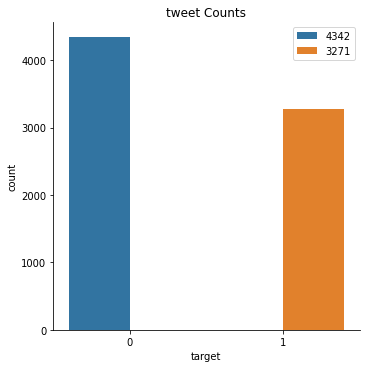

In [334]:
import seaborn as sns
sns.catplot(data = train_df, x = 'target', kind='count', hue='target')
plt.legend([index for index in train_df['target'].value_counts()])
plt.title('tweet Counts')
plt.show()


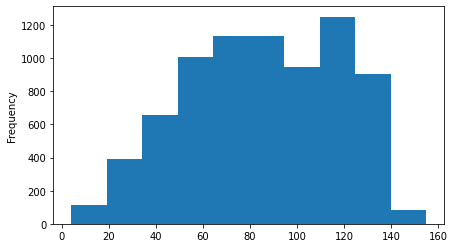

In [333]:
train_df['text'].str.len().plot.hist()

In [18]:
!pip install emoji

     |████████████████████████████████| 43 kB 721 kB/s 
  Created wheel for emoji: filename=emoji-0.5.4-py3-none-any.whl size=42175 sha256=732e2aee35d9c669856fd85d647e74539457d6bd83fd3c2695b31b3f1a7af04f
  Stored in directory: /root/.cache/pip/wheels/22/95/98/a21ffcc81fac65949a085ceff9dca4a145a32d9bbfcbf1cb31
Successfully built emoji


In [0]:
import emoji

#does the text contain an emoji?
def text_has_emoji(text):
    for character in text:
        if character in emoji.UNICODE_EMOJI:
            return True
    return False
#remove the emoji
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [0]:
import string
punct =[]
punct += list(string.punctuation)
punct += '’'
punct.remove("'")
def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, ' ')
    return text

In [0]:
def text_processing(df):
  
    # lowercase everything
    df['text'] = df['text'].apply(lambda x: x.lower())
    # get rid of '\n' from whitespace 
    df['text'] = df['text'].apply(lambda x: x.replace('\n', ' '))
    # regex remove hyperlinks
    df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)
    # removing '&gt;'
    df['text'] = df['text'].apply(lambda x: x.replace('&gt;', ''))
    # Removing Emojis from tokens
    df['text'] = df['text'].apply(lambda x: deEmojify(x))
    # remove punctuations
    df['text'] = df['text'].apply(remove_punctuations)
    # remove ' s ' that was created after removing punctuations
    df['text'] = df['text'].apply(lambda x: str(x).replace(" s ", " "))
    
    return df

In [218]:
train_df = text_processing(train_df)
test_df_kaggle = text_processing(test_df_kaggle)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [205]:
train_df.head()

,text,target
0,our deeds are the reason of this earthquake m...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to 'shelter in place' are ...,1
3,13 000 people receive wildfires evacuation or...,1
4,just got sent this photo from ruby alaska as ...,1


In [206]:
test_df_kaggle.head()

,id,text,taget
0,0,just happened a terrible car crash,0
1,2,heard about earthquake is different cities s...,0
2,3,there is a forest fire at spot pond geese are...,0
3,9,apocalypse lighting spokane wildfires,0
4,11,typhoon soudelor kills 28 in china and taiwan,0


In [0]:
import re

In [220]:
train_df['text'] = train_df['text'].apply(lambda x: re.sub('[^a-zA-z\s]', '', x))
test_df_kaggle['text'] = test_df_kaggle['text'].apply(lambda x: re.sub('[^a-zA-z\s]', '', x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [221]:
train_df.head()

,text,target
0,our deeds are the reason of this earthquake m...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are be...,1
3,people receive wildfires evacuation orders ...,1
4,just got sent this photo from ruby alaska as ...,1


In [222]:
test_df_kaggle.head()

,id,text,target
0,0,just happened a terrible car crash,0
1,2,heard about earthquake is different cities s...,0
2,3,there is a forest fire at spot pond geese are...,0
3,9,apocalypse lighting spokane wildfires,0
4,11,typhoon soudelor kills in china and taiwan,0


In [0]:
#target = pd.Series(np.zeros_like(test_df_kaggle['text']))

In [0]:
#test_df_kaggle_updated = pd.DataFrame({'id':test_df_kaggle.id, 
#                               'text':test_df_kaggle.text,
#                               'target': target})
#test_df_kaggle_updated.head()

In [0]:
#train_df.dtypes

In [0]:
#test_df_kaggle_updated.dtypes

In [0]:
#test_df_kaggle_updated['target']=test_df_kaggle_updated['target'].apply(lambda x: str(x))

In [0]:
# Création d'un tf dataset à partir de pandas 
train_tf = tf.data.Dataset.from_tensor_slices((train_df['text'].values, train_df['target'].values))
test_tf_kaggle = tf.data.Dataset.from_tensor_slices((test_df_kaggle['text'].values, test_df_kaggle['target'].values))

In [0]:
# Shuffle le dataset 
train_tf = train_tf.shuffle(50000)
test_tf_kaggle = test_tf_kaggle.shuffle(50000) 

In [225]:
for example, target in train_tf.take(1):
  print(example.numpy(), target.numpy())

print()

#for exemple in test_tf_kaggle.take(1):
#  print(exemple.numpy())

for example, target in test_tf_kaggle.take(1):
  print(example.numpy(), target.numpy())


b'vietnam war patch us st evacuation hospital highland medics  ' 1

b' traffic southe  roadpol east accident on a near lewes is it kingston roundabout rather than a' 0


In [92]:
# Chargement des langages français et anglais de spacy 
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [0]:
import en_core_web_md
nlp = en_core_web_md.load()

In [0]:
# Import Stop words 
from spacy.lang.en.stop_words import STOP_WORDS

In [228]:
corpus_train = " ".join(train_df['text'].to_list())
corpus_train= corpus_train.strip().encode("utf-8").decode("utf-8")
corpus_train

'our deeds are the reason of this  earthquake may allah forgive us all forest fire near la ronge sask  canada all residents asked to shelter in place are being notified by officers  no other evacuation or shelter in place orders are expected   people receive  wildfires evacuation orders in california  just got sent this photo from ruby  alaska as smoke from  wildfires pours into a school   rockyfire update    california hwy   closed in both directions due to lake county fire    cafire  wildfires  flood  disaster heavy rain causes flash flooding of streets in manitou  colorado springs areas im on top of the hill and i can see a fire in the woods    theres an emergency evacuation happening now in the building across the street im afraid that the tornado is coming to our area    three people died from the heat wave so far haha south tampa is getting flooded hah  wait a second i live in south tampa what am i gonna do what am i gonna do fvck  flooding  raining  flooding  florida  tampabay  

In [229]:
corpus_test_kaggle = " ".join(test_df_kaggle['text'].to_list())
corpus_test_kaggle= corpus_test_kaggle.strip().encode("utf-8").decode("utf-8")
corpus_test_kaggle

'just happened a terrible car crash heard about  earthquake is different cities  stay safe everyone  there is a forest fire at spot pond  geese are fleeing across the street  i cannot save them all apocalypse lighting   spokane  wildfires typhoon soudelor kills  in china and taiwan were shaking   its an earthquake theyd probably still show more life than arsenal did yesterday  eh  eh  hey  how are you  what a nice hat  fuck off  no i dont like cold  nooooooooo  dont do that  no dont tell me that  what if   awesome  birmingham wholesale market is ablaze bbc news   fire breaks out at birminghams wholesale market   sunkxssedharry will you wear shorts for race ablaze    previouslyondoyintv  toke makinwas marriage crisis sets nigerian twitter ablaze     check these out       nsfw psa  im splitting my personalities      techies follow  ablaze co    burners follow  ablaze beware world ablaze sierra leone  amp  guap  burning man ablaze  by turban diva  via  etsy not a diss song  people will ta

In [230]:
%%time
import time
nlp.max_length = len(corpus_train)
train_nlp = nlp(corpus_train)
test_kaggle_nlp = nlp(corpus_test_kaggle)

CPU times: user 23 s, sys: 486 ms, total: 23.5 s
Wall time: 23.6 s


In [0]:
#STOP_WORDS.add('start')
#STOP_WORDS.add('end')
STOP_WORDS.add('PRON')
STOP_WORDS.add('amp')
STOP_WORDS.add('like')
STOP_WORDS.add('im')

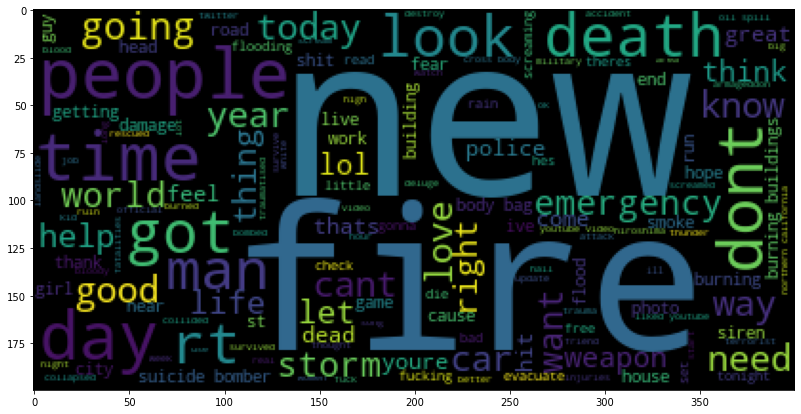

In [99]:
plt.rcParams['figure.figsize']=20,7
from wordcloud import  WordCloud
wd = WordCloud( stopwords=STOP_WORDS)
cloud = wd.generate(train_nlp.text)
plt.imshow(cloud)

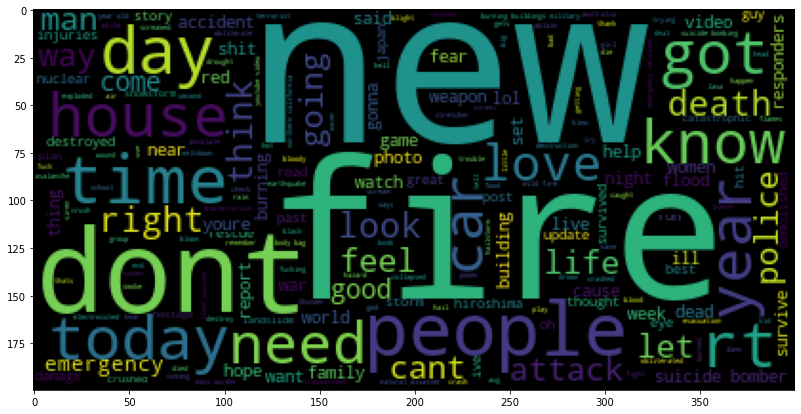

In [100]:
plt.rcParams['figure.figsize']=20,7
from wordcloud import  WordCloud
wd = WordCloud( stopwords=STOP_WORDS)
cloud = wd.generate(test_kaggle_nlp.text)
plt.imshow(cloud)

In [232]:
# Création d'un set() qui va prendre tous les tokens unique de notre corpus de texte du train_set
# Nous allons par la suite appliquer les mêmes paramètres au test_set 
%%time
tokens_train = [token.lemma_ for token in train_nlp if token.text not in STOP_WORDS]
vocabulary_set_train= set(tokens_train)
vocab_size_train = len(vocabulary_set_train)
print('vocabulary_size_train : ', vocab_size_train)

vocabulary_size_train :  14062
CPU times: user 224 ms, sys: 0 ns, total: 224 ms
Wall time: 225 ms


In [0]:
# Création d'un set() qui va prendre tous les tokens unique de notre corpus de texte du test
#%%time
#tokens_test = [token.lemma_ for token in test_kaggle_nlp if token.text not in STOP_WORDS]
#vocabulary_set_test= set(tokens_test)
#vocab_size_test = len(vocabulary_set_test)
#print('vocabulary_size_test : ', vocab_size_test)

In [234]:
# Création d'un nombre pour chacun des tokens du train
encoder_train = tfds.features.text.TokenTextEncoder(vocabulary_set_train)
print(encoder_train.vocab_size)

14064


In [0]:
# Création d'un nombre pour chacun des tokens du test
#encoder_test = tfds.features.text.TokenTextEncoder(vocabulary_set_test)
#print(encoder_test.vocab_size)

In [133]:
# Regardons le résultat sur un exemple sur le train
for example, target in train_tf.take(1):
  print(encoder_train.encode(example.numpy()))
  print(example.numpy())
  print(target.numpy())

[14061, 14061, 6073, 1331, 1812, 14061, 14061, 4665, 14061, 14061, 14061, 8600, 7434, 14002, 14061, 14061, 14061, 5175, 14061, 10860, 14061, 14061, 14061, 14061]
b'you cant fight fate and you cant survive alone    i cant help but notice that almost seems like a definition of who i am   '
0


In [242]:
# Regardons le résultat sur un exemple sur le test
for example, target in test_tf_kaggle.take(1):
  print(encoder_test.encode(example.numpy()))
  print(example.numpy())
  print(target.numpy())

[8464, 7339, 3645, 6542, 6839, 8464, 8464, 6775, 8464, 8464, 8464, 8464, 1522, 3668, 8464, 1924, 8464, 8464, 8464, 8464, 3934, 5784]
b'once thought dead google glass gets a second coming  though considered an epic failure according to its makers and a recent patent   '
0


In [0]:
# Encodons maintenant tous les éléments du dataset train
def encode_train(text_tf, label):
  encoded_text = encoder_train.encode(text_tf.numpy())
  return encoded_text, label

# Utilisation de la py_function pour encoder tout le dataset 
def encode_map_fn(text, label):
  return tf.py_function(encode_train, inp=[text, label], Tout=(tf.int64, tf.int64))

all_encoded_train_data = train_tf.map(encode_map_fn)

In [244]:
for exemple, target in all_encoded_train_data.take(1):
  print(exemple.numpy(), target.numpy())

[14063 14063 14063 10875 14063  1653 14063 12192  9486 14063  9057] 0


In [0]:
all_encoded_test_data = test_tf_kaggle.map(encode_map_fn)

In [247]:
for exemple, target in all_encoded_test_data.take(1):
  print(exemple.numpy())
  print(target.numpy())

[14063 14063 14063 14063  6046 13208 12348 14063 14063 13411  5295]
0


In [0]:
# Train Test Split
TAKE_SIZE = int(0.75*train_df.shape[0])

train_data = all_encoded_train_data.take(TAKE_SIZE).shuffle(50000)
train_data = train_data.padded_batch(16,  padded_shapes=([-1], []))

test_data = all_encoded_train_data.skip(TAKE_SIZE)
test_data = test_data.padded_batch(16, padded_shapes=([-1], []))

test_kaggle = all_encoded_test_data.shuffle(50000)
test_kaggle = test_kaggle.padded_batch(16,  padded_shapes=([-1], []))


In [250]:
 # Regardons un batch 
for tweet, target in test_kaggle.take(1):
  print(tweet, target)

tf.Tensor(
[[14063 14063 10225 14063 12619 14063  4665 14063 10478 14063     0     0
      0     0     0     0     0     0     0     0     0     0]
 [14063 11861  8926 11007  9330  3627  7434 14063 14063 14063  5923  3241
  10597 10193 14063 14063 14063 14063     0     0     0     0]
 [ 5979 14063 14063  2461 11972 14063  2008 14063  5924  3241 10160 14063
     24  1252 14063 14063  2113     0     0     0     0     0]
 [11560 14063 14063 14063 14063 14063 14063 14063     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [14063  5548 14063 14063 14063  2504 13573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [11596 11499  1839 11143 12114 14063 14063 14063 13848  5545     0     0
      0     0     0     0     0     0     0     0     0     0]
 [ 7244 14063 14063  3114  1826 11796  1428     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [ 4795  1989  3791 11809 1406

#Modeling
Créons un modèle basé sur une couche LSTM pour classer nos différentes traductions

In [0]:
model = tf.keras.Sequential([
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(encoder_train.vocab_size, 64),

                  # Couche LSTM Bidirectionnelle
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),

                  # Couche CNN
                  tf.keras.layers.Conv1D(16, 3, activation="relu"),
                  
                  # Nouvelle couche LSTM Bidirectionnel
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                  # Nouvelle couche LSTM
                  tf.keras.layers.LSTM(32, return_sequences=False),               

                  # Couche Dense classique 
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dense(32, activation='relu'),
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),

                  # Couche de sortie avec le nombre de neurones en sortie égale au nombre de classe avec fonction softmax
                  tf.keras.layers.Dense(6, activation="softmax")
                                              
])

In [253]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          900096    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          6160      
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         41472     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2

In [0]:
# Créons un learning rate schedule pour décroitre le learning rate à mesure que nous entrainons le modèle 
initial_learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=2500,
    decay_rate=0.96,
    staircase=True)

# Utilisation d'un compileur simple avec un optimiseur Adam pour le calcul de nos gradients 
optimizer= tf.keras.optimizers.Adam(
    learning_rate = lr_schedule
)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [0]:
# Balance des classes
class_weight = {
    
    0:0.57,
    1:0.43
}

In [256]:
# Entrainement du modèle 
history = model.fit(train_data, 
                    epochs=80, 
                    validation_data=test_data,
                    class_weight=class_weight)

Train for 357 steps, validate for 119 steps
Epoch 1/80
357/357 [==============================] - 33s 91ms/step - loss: 0.8949 - sparse_categorical_accuracy: 0.1736 - val_loss: 0.8698 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/80
357/357 [==============================] - 24s 69ms/step - loss: 0.7549 - sparse_categorical_accuracy: 0.3927 - val_loss: 0.5599 - val_sparse_categorical_accuracy: 0.7647
Epoch 3/80
357/357 [==============================] - 25s 69ms/step - loss: 0.4464 - sparse_categorical_accuracy: 0.7737 - val_loss: 0.2304 - val_sparse_categorical_accuracy: 0.8524
Epoch 4/80
357/357 [==============================] - 25s 70ms/step - loss: 0.1866 - sparse_categorical_accuracy: 0.8644 - val_loss: 0.1779 - val_sparse_categorical_accuracy: 0.8430
Epoch 5/80
357/357 [==============================] - 25s 69ms/step - loss: 0.1473 - sparse_categorical_accuracy: 0.8933 - val_loss: 0.1394 - val_sparse_categorical_accuracy: 0.8892
Epoch 6/80
357/357 [======================

In [0]:
y_pred = []

for example, label in test_kaggle.take(len(test_df_kaggle)):
  #print(encoder_train.decode(example.numpy()[0]))
  y_pred.append(model.predict_classes(example)[0])
  #print("Real: {}".format(label[0]))

#model1 = {}
#for example, label in test_kaggle.take(len(test_df_kaggle)):
#  model1[example] = model.predict_classes(example)[0]

  #model1 = {
  #    'target': model.predict_classes(example)[0]
  #}

  #y_predictions = pd.DataFrame(columns=['target'],data=model1)
  #y_predictions.to_csv('Real_or_Not__NLP_with_Disaster_Tweets-model1.csv', index=False)


In [0]:
test_df_kaggle=test_df_kaggle.drop(['target'], axis=1)

In [285]:
test_df_kaggle.head()

,id,text
0,0,just happened a terrible car crash
1,2,heard about earthquake is different cities s...
2,3,there is a forest fire at spot pond geese are...
3,9,apocalypse lighting spokane wildfires
4,11,typhoon soudelor kills in china and taiwan


In [0]:
target = pd.Series(y_pred)

In [316]:
target.dtypes

dtype('int64')

In [0]:
target = target.astype('int64', copy=False)

In [0]:
test_df_kaggle['target']=target

In [0]:
test_df_kaggle['target']=test_df_kaggle.target.apply(lambda x: str(x))

In [0]:
test_df_kaggle['target']=test_df_kaggle.target.apply(lambda x: str(x[0:1]))

In [0]:
test_df_kaggle['target']=test_df_kaggle.target.apply(lambda x: int(x=0))

In [330]:
test_df_kaggle.dtypes

id        int64
target    int64
dtype: object

In [331]:
test_df_kaggle.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [287]:
#test_df_kaggle['target']=target
#test_df_kaggle = test_df_kaggle.drop(['text'], axis=1)
#test_df_kaggle.shape

(3263, 2)

In [0]:
test_df_kaggle.to_csv('Real_or_Not__NLP_with_Disaster_Tweets-model1.csv', index=False)

#Evaluation

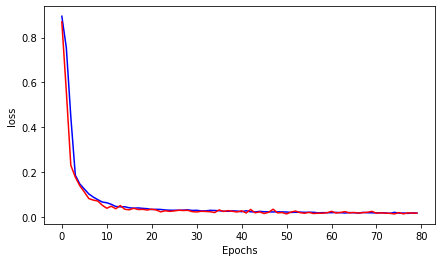

In [260]:
import matplotlib.pyplot as plt

# Visualisation du processus d'entrainement sur la loss function 
plt.rcParams['figure.figsize']=7,4
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

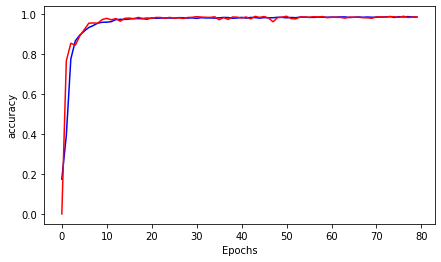

In [261]:
# Visualisation de l'entrainement sur l'accuracy 
plt.plot(history.history["sparse_categorical_accuracy"], color="b")
plt.plot(history.history["val_sparse_categorical_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()